In [1]:
from classes_and_functions import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def harvest_function(time, dt):

    tau = 1

    d_energy = np.exp(-time/tau)*(1 - np.exp(-dt/tau))

    return d_energy

def exploitation_effort_function(time, dt):

    return 0

def travel_effort_function(time):

    return 0


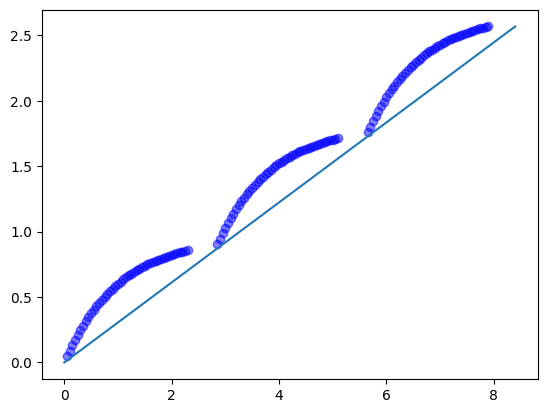

In [10]:
t_travel = 0.5

agent_a = agent(t_travel, travel_effort_function)

patch_0 = patch(harvest_function, exploitation_effort_function)
patch_1 = patch(harvest_function, exploitation_effort_function)
patch_2 = patch(harvest_function, exploitation_effort_function)

patches = [patch_0,patch_1,patch_2]

i = 0

while i<3:

    agent_a.exploit_patch(patches[i])

    # plt.scatter(patches[i].residence_time, patches[i].total_harvested_energy, c='red', alpha=0.5)
    plt.scatter(agent_a.time, agent_a.energy, c='blue', alpha=0.5)

    if agent_a.intake_rate<0.1:

        i += 1
        agent_a.travel()

average_intake_rate = agent_a.energy/agent_a.time

time_array = np.linspace(0,agent_a.time)
plt.plot(time_array, time_array*average_intake_rate)


In [12]:
agent_a.exploit_patch(patch_0)